#  Sales Analysis

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('sales_data_sample.csv',encoding='unicode_escape')

In [5]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [6]:
df.shape

(2823, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


## Statistics  about Data

In [8]:
df .describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [9]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [10]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [12]:
df.duplicated().any()

False

## # Sales Analysis: Total Sales per Year



sales_by_year = df.groupby('YEAR_ID')['SALES'].sum().reset_index()
print("\nTotal Sales by Year:")
print(sales_by_year)

C:\Users\welcome\AppData\Local\Temp\ipykernel_9948\1276255744.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='YEAR_ID', y='SALES', data=sales_by_year, palette='viridis')


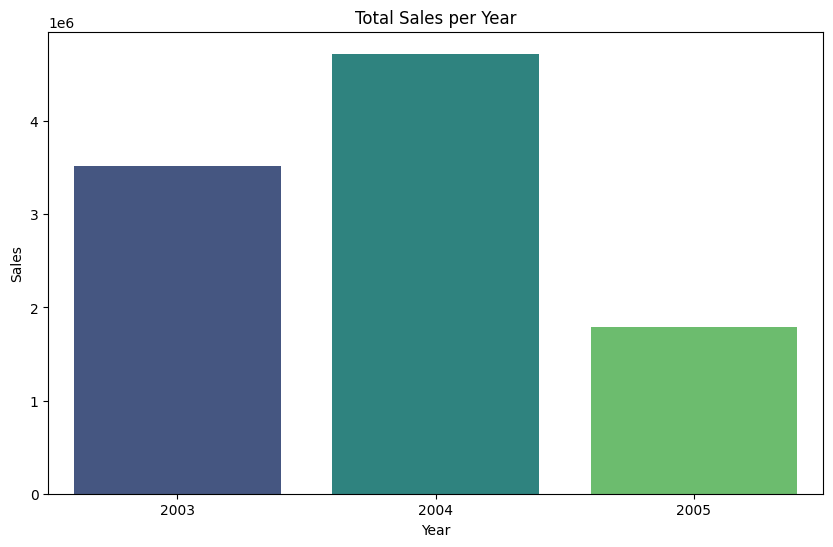

In [14]:
# Visualization: Sales per Year
plt.figure(figsize=(10, 6))
sns.barplot(x='YEAR_ID', y='SALES', data=sales_by_year, palette='viridis')
plt.title('Total Sales per Year')
plt.ylabel('Sales')
plt.xlabel('Year')
plt.show()

# Sales per Quarter

In [34]:

sales_by_quarter = df.groupby('QTR_ID')['SALES'].sum().reset_index()
print("\nTotal Sales by Quarter:")
print(sales_by_quarter)


Total Sales by Quarter:
   QTR_ID       SALES
0       1  2350817.73
1       2  2048120.30
2       3  1758910.81
3       4  3874780.01


C:\Users\welcome\AppData\Local\Temp\ipykernel_9948\1720192451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='QTR_ID', y='SALES', data=sales_by_quarter, palette='Blues')


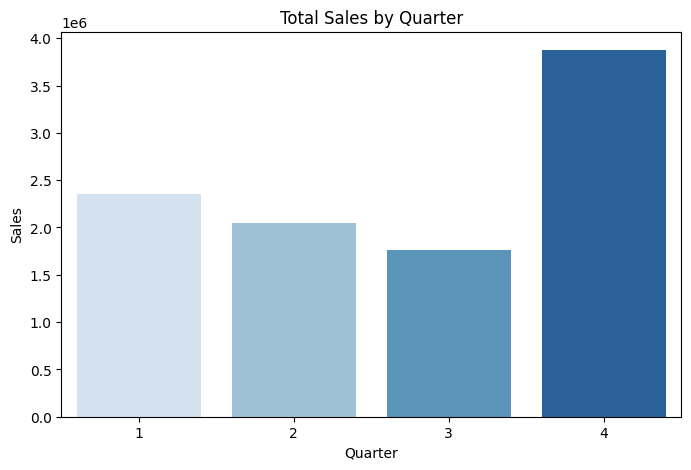

In [16]:
plt.figure(figsize=(8, 5))
sns.barplot(x='QTR_ID', y='SALES', data=sales_by_quarter, palette='Blues')
plt.title('Total Sales by Quarter')
plt.ylabel('Sales')
plt.xlabel('Quarter')
plt.show()

# # Top 5 Products by Sales

In [35]:

top_products = df.groupby('PRODUCTCODE')['SALES'].sum().nlargest(5).reset_index()
print("\nTop 5 Products by Sales:")
print(top_products)



Top 5 Products by Sales:
  PRODUCTCODE      SALES
0    S18_3232  288245.42
1    S10_1949  191073.03
2    S10_4698  170401.07
3    S12_1108  168585.32
4    S18_2238  154623.95


C:\Users\welcome\AppData\Local\Temp\ipykernel_9948\2188961902.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PRODUCTCODE', y='SALES', data=top_products, palette='coolwarm')


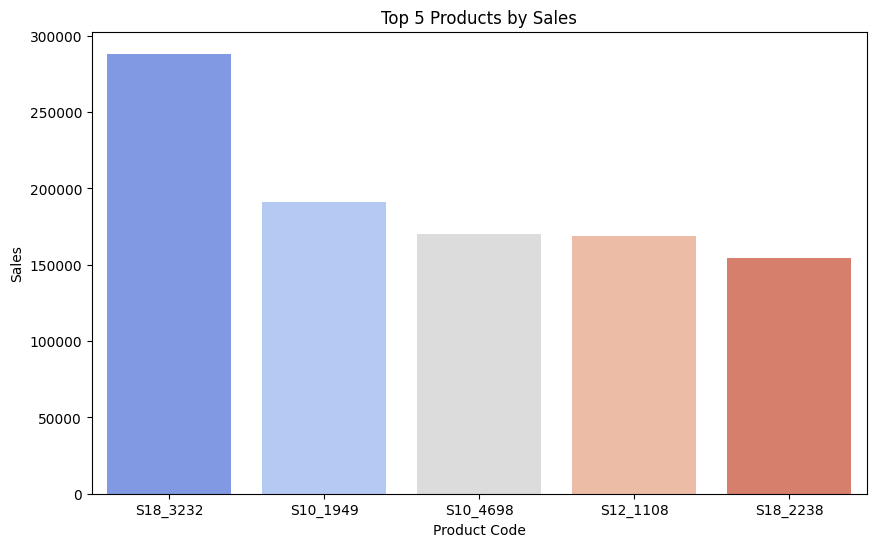

In [18]:
# Visualization: Top 5 Products by Sales
plt.figure(figsize=(10, 6))
sns.barplot(x='PRODUCTCODE', y='SALES', data=top_products, palette='coolwarm')
plt.title('Top 5 Products by Sales')
plt.ylabel('Sales')
plt.xlabel('Product Code')
plt.show()

# Sales by Deal Size

In [36]:

sales_by_dealsize = df.groupby('DEALSIZE')['SALES'].sum().reset_index()
print("\nTotal Sales by Deal Size:")
print(sales_by_dealsize)


Total Sales by Deal Size:
  DEALSIZE       SALES
0    Large  1302119.26
1   Medium  6087432.24
2    Small  2643077.35


C:\Users\welcome\AppData\Local\Temp\ipykernel_9948\2118022414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DEALSIZE', y='SALES', data=sales_by_dealsize, palette='muted')


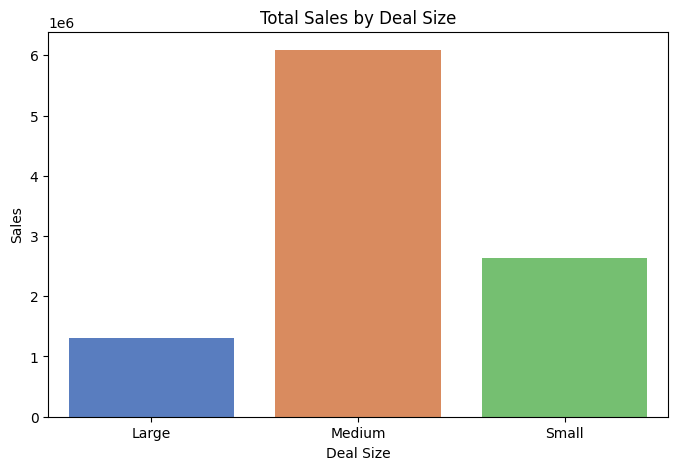

In [20]:
# Visualization: Sales by Deal Size
plt.figure(figsize=(8, 5))
sns.barplot(x='DEALSIZE', y='SALES', data=sales_by_dealsize, palette='muted')
plt.title('Total Sales by Deal Size')
plt.ylabel('Sales')
plt.xlabel('Deal Size')
plt.show()

# Sales by Deal Size

In [37]:

quantity_by_dealsize = df.groupby('DEALSIZE')['QUANTITYORDERED'].sum().reset_index()
print("\nTotal Quantity Ordered by Deal Size:")
print(quantity_by_dealsize)


Total Quantity Ordered by Deal Size:
  DEALSIZE  QUANTITYORDERED
0    Large             7414
1   Medium            52519
2    Small            39134


C:\Users\welcome\AppData\Local\Temp\ipykernel_9948\3639221235.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DEALSIZE', y='QUANTITYORDERED', data=quantity_by_dealsize, palette='Set2')


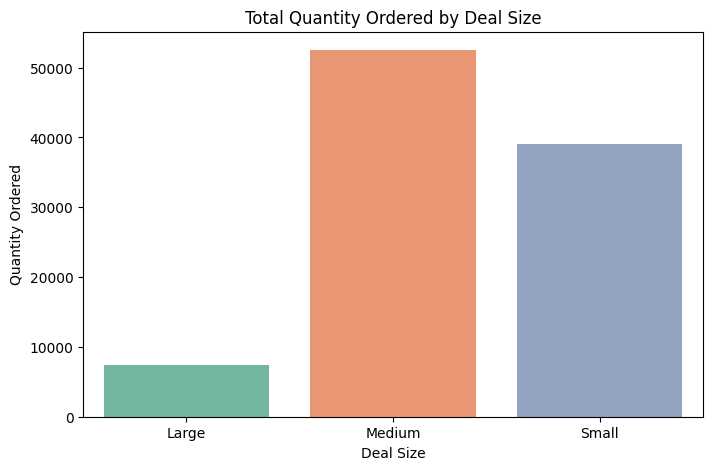

In [22]:
# Visualization: Quantity Ordered by Deal Size
plt.figure(figsize=(8, 5))
sns.barplot(x='DEALSIZE', y='QUANTITYORDERED', data=quantity_by_dealsize, palette='Set2')
plt.title('Total Quantity Ordered by Deal Size')
plt.ylabel('Quantity Ordered')
plt.xlabel('Deal Size')
plt.show()

# Select only numeric columns for correlation

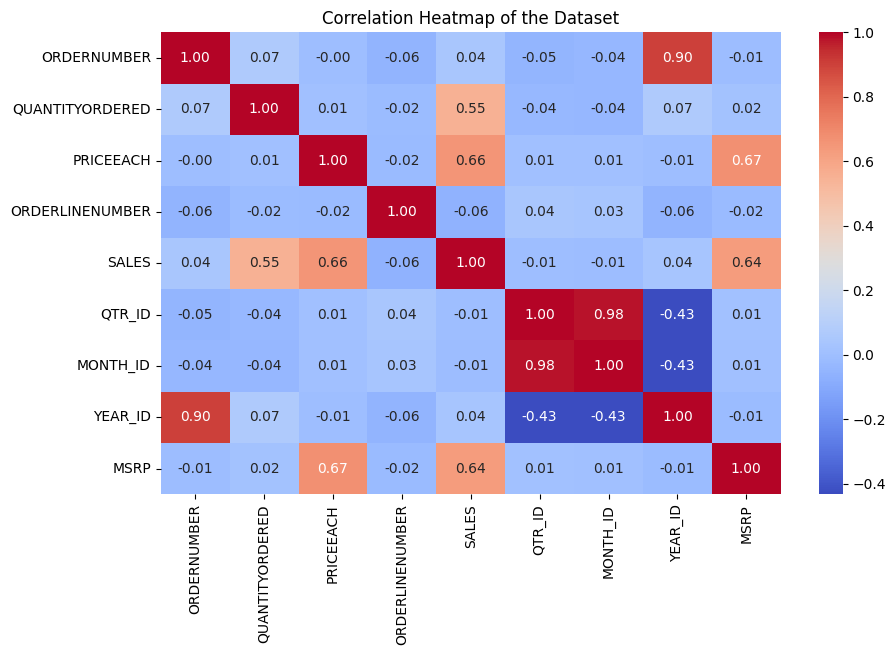

In [38]:

numeric_df = df.select_dtypes(include=[np.number])

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of the Dataset')
plt.show()


# Analysis of Orders by Status

In [26]:

orders_by_status = df['STATUS'].value_counts()
print("\nOrders by Status:")
print(orders_by_status)


Orders by Status:
STATUS
Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64


C:\Users\welcome\AppData\Local\Temp\ipykernel_9948\2854989836.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='STATUS', data=df, palette='Pastel1')


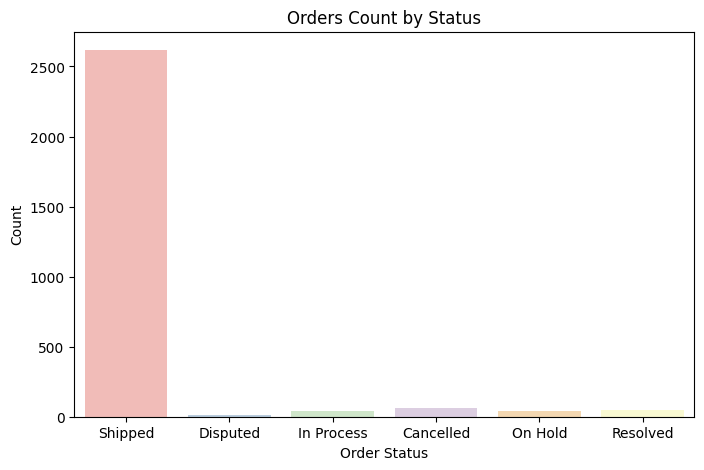

In [29]:
# Visualization: Orders by Status
plt.figure(figsize=(8, 5))
sns.countplot(x='STATUS', data=df, palette='Pastel1')
plt.title('Orders Count by Status')
plt.ylabel('Count')
plt.xlabel('Order Status')
plt.show()


# Sales Trend over Time

In [30]:

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
sales_trend = df.groupby(df['ORDERDATE'].dt.to_period('M'))['SALES'].sum()

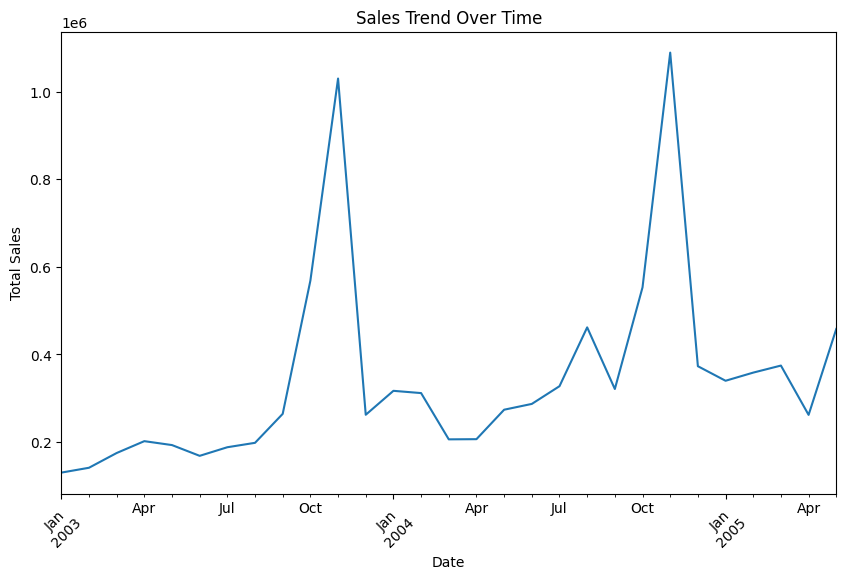

In [32]:
# Visualization: Sales Trend
plt.figure(figsize=(10, 6))
sales_trend.plot()
plt.title('Sales Trend Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()